In [2]:
import pandas as pd
import numpy as np

In [17]:
import math

**Задача 1**

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.



In [10]:
row = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150], dtype = np.int16)

**среднее арифметическое**

In [18]:
count = 0
total = 0
for elem in row:
    total +=elem
    count += 1

In [20]:
row_mean = row.sum()/row.size
row_mean

65.3

In [21]:
row_mean = total/count
row_mean

65.3

In [22]:
row_mean.mean()

65.3

**среднее квадратическое отклонение**

In [23]:
row_new = row - row_mean
row_new

array([ 34.7,  14.7,   9.7,  11.7,  23.7, -32.3, -20.3, -40.3,  -0.3,
       -48.3, -35.3, -41.3,  -8.3, -10.3,   4.7,   9.7,  -0.3,  18.7,
        24.7,  84.7])

In [28]:
std_deviation = np.sqrt(sum(np.square(row_new))/row_new.size)
std_deviation

30.823854398825596

In [30]:
std_deviation = row.std()
std_deviation

30.823854398825596

**смещенная оценка дисперсии**

In [37]:
biased_sample_variance = (1/row_new.size)*(sum(np.square(row_new)))
biased_sample_variance

950.1100000000001

In [39]:
row.var(ddof=0)

950.11

**несмещенная оценка дисперсии**

In [38]:
sample_variance = (1/(row_new.size - 1))*(sum(np.square(row_new)))
sample_variance

1000.1157894736842

In [40]:
row.var(ddof=1)

1000.1157894736842

**Задача 2**

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.



In [44]:
first_q = np.quantile(row, 0.25)
first_q

42.0

In [69]:
third_q = np.quantile(row, 0.75)
third_q

81.0

интерквантильное расстояние

In [53]:
third_q - first_q

39.0

In [71]:
second_q = np.quantile(row, 0.5)
second_q

67.5

То же самое, только с графиками и pandas

In [49]:
df = pd.DataFrame(row, columns=['Column_1'])
df.head(3)

,Column_1
0,100
1,80
2,75


<AxesSubplot:>

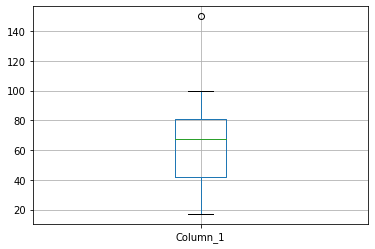

In [54]:
df.boxplot()

In [62]:
q1 = df['Column_1'].quantile(0.25)
q3 = df['Column_1'].quantile(0.75)
iqr = q3 - q1
iqr

39.0

In [63]:
q1

42.0

In [64]:
q3

81.0

In [59]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [66]:
outliers = df.loc[(df['Column_1'] < boxplot_range[0]) | (df['Column_1'] > boxplot_range[1]) ]
outliers.shape[0]

1

In [67]:
outliers.shape[0] / df.shape[0]

0.05

Если удалить единственный выброс, то результат чуть-чуть изменится

In [78]:
df_new = df.loc[(df['Column_1'] > boxplot_range[0]) & (df['Column_1'] < boxplot_range[1]) ]

In [79]:
df_new.size

19

<AxesSubplot:>

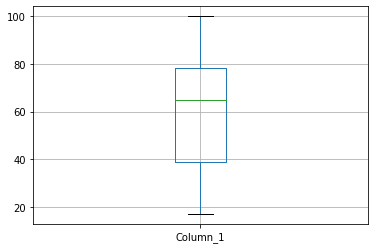

In [80]:
df_new.boxplot()

In [83]:
q1 = df_new['Column_1'].quantile(0.25)
q3 = df_new['Column_1'].quantile(0.75)
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-20.25, 137.75)

Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

$$p(A|Ba) = 0.8$$  
$$p(A|Bb) = 0.7$$  
$$p(A|Bc) = 0.9$$

Вероятность, что студент из факультета А = 1/4, из факультета В = 1/4 и из факультета С = 1/2 пропорционально количеству стуентов на факультетах.

Вычисления будут по формуле Байеса.  
Знаменаталеь - по формуле полной вероятности

In [86]:
h = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9

для факультета А

In [87]:
P_a = 0.25 * 0.8/h
P_a

0.24242424242424246

для факультета В

In [89]:
P_b = 0.25 * 0.7/h
P_b

0.21212121212121213

для факультета С

In [90]:
P_c = 0.5 * 0.9/h
P_c

0.5454545454545455

In [91]:
P_a + P_b + P_c

1.0